## Lab 8: KOH1: Podstawowa sieć Kohonena (2 tygodnie, 2 punkty)
Zaimplementować sieć Kohonena złożoną z neuronów w prostokątnej siatce $M×N$ (M,N są parametrami programu), która działa dla zbioru wektorów (wszystkich o tej samej długości).

Zaimplementować następujące funkcje sąsiedztwa:
- funkcję gaussowską
- minus druga pochodną funkcji gaussowskiej.

W obu implementacjach dodać możliwość zmiany szerokości sąsiedztwa z użyciem parametru (technicznie oznacza to przemnożenie argumentu x przez stałą) i sprawdzić dla kilku wartości z przedziału $[0.1, 1]$.

Jako funkcji wygaszającą uczenie wraz z kolejnymi iteracjami użyć funkcji $ \alpha (t) = e^{-\frac{t}{\lambda}} $.

Przetestować działanie sieci na dostarczonych prostych zbiorach danych:
- danych 2d skupionych w wierzchołkach sześciokąta,
- danych 3d skupionych w wierzchołkach sześcianu.

Dane, odpowiednio hexagon i cube, mają 3/4 kolumny. Do sieci podać tylko kolumny x, y i z (w przypadku
sześciokąta bez z). Ostatnia kolumna, c, zawiera identyfikator wierzchołka bryły/figury. 

Czy klastry w odwzorowaniu znalezionym przez sieć pokrywają się w liczbą klastrów w faktycznych danych? 

Czy znalezione klastry pokrywają się z identyfikatorami wierzchołków?

## TODO:
- ~~implement rectangle Kohonen network~~
- ~~implement hexagon Kohonen network~~
- ~~implement gaussian neighborhood function~~
- ~~implement minus gaussian neighborhood second derivative function~~
- ~~implement decreasing learning rate~~
- ~~test clustering on simple 2d data~~
- ~~test clustering on simple 3d data~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SelfOrganizingMap as SOM
colors = ['r','g','b','c','k','y',(0.9,0.2,0.9), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]

### Plots

Every neuron is represented by a square or a hexagon. 

Each cluster is represented by a different color. Color of the neuron is a sum of colors of points from data for which this neuron is the closest. Intensity corresponds to the number of points assigned to this neuron. 

Each point from the data is also represented by a symbol with color matching its class. These symbols let us determine if there are any "outliers" in each cluster as represented by SOM (ie symbols of different color than the background). Also, by looking at the symbols, even a single data point can be noticed should it be assigned to a wrong cluster.

In [2]:
def compare_scalers(hexagonal_map, dataset_name):
    scalers = [0.01,0.1, 0.5, 1]
    map_sizes = [[5,5],[10,10],[30,30]]

    fig, axs = plt.subplots(4,3,figsize=(12,16))
    for i in range(4):
        for j in range(3):
            som = SOM.SelfOrganizingMap(map_sizes[j][0],map_sizes[j][1],x_train.shape[1], hexagonal_map=hexagonal_map)
            som.init_weights()
            som.train(data=x_train, epochs=10,neighbourhood_scaler=scalers[i], learning_rate=0.3)
            som.plot_map(data=x_train, classes=y_train, title=f"Scaler: {scalers[i]}, Map: {map_sizes[j][0]}x{map_sizes[j][1]}", ax=axs[i,j])

    fig.suptitle(f'Data: {dataset_name}, 10 epochs, learning rate 0.3',y=0.93,size=20)
    plt.show()

## Dataset 1: 2d simple data

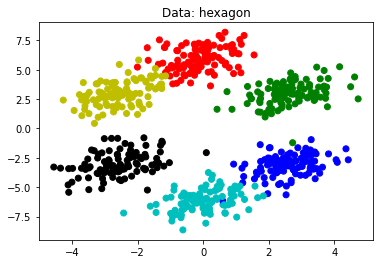

          x         y  c
0  2.402047  3.728695  1
1 -0.660032  7.047206  0
2  2.202839 -2.394303  2
3  3.179183  2.593885  1
4  3.173320 -2.152688  2


In [3]:
df_train = pd.read_csv('data/hexagon.csv')
plt.scatter(df_train['x'], df_train['y'], c=np.array(colors, dtype=object)[df_train['c']])
plt.title("Data: hexagon")
plt.show()
print(df_train.head())


x_train = df_train[["x","y"]].to_numpy()
y_train = df_train[["c"]].to_numpy()

### Map elements: squares

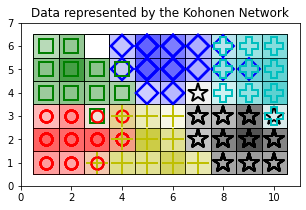

In [4]:
som = SOM.SelfOrganizingMap(10,6,2, hexagonal_map=False)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.5, learning_rate=0.3, distance_function=SOM.NeighbourhoodGaussian)
som.plot_map(data=x_train, classes=y_train)

### Map elements: hexagons

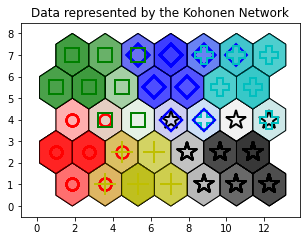

In [5]:
som = SOM.SelfOrganizingMap(7,5,2, hexagonal_map=True)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.1, learning_rate=0.3, distance_function=SOM.NeighbourhoodMexicanHat)
som.plot_map(data=x_train, classes=y_train)

### Comparison of various distance scalers

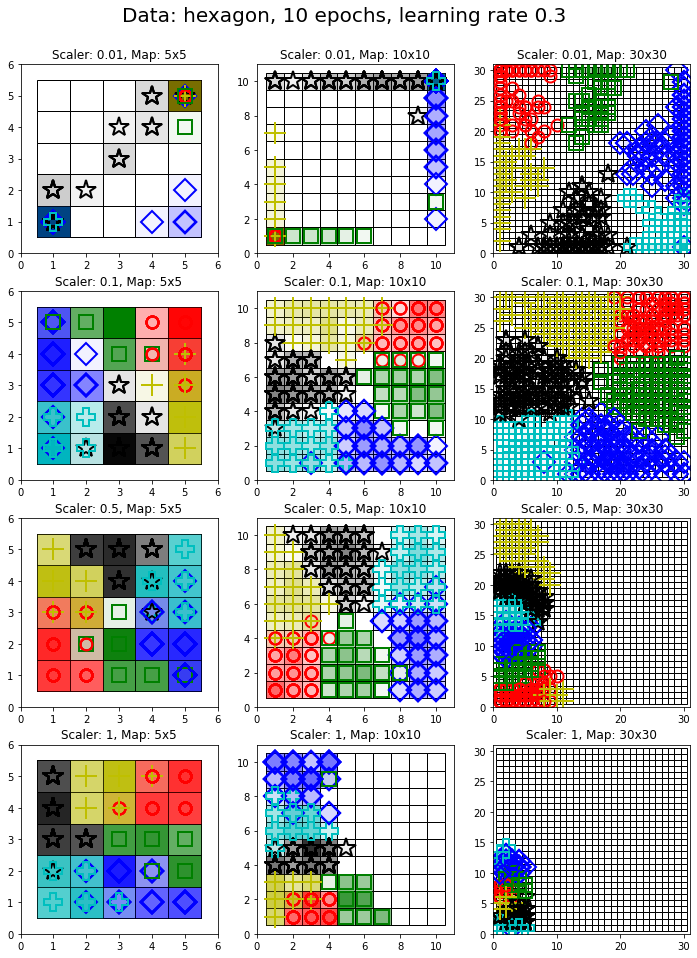

In [6]:
compare_scalers(hexagonal_map=False,dataset_name="hexagon")

## Dataset 2: 3d simple data

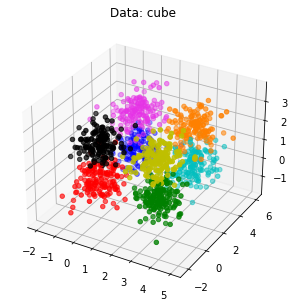

          x         y         z  c
0  0.187781  0.239537  0.382492  0
1 -1.308979 -0.143321 -0.966648  0
2 -0.987613  0.679918 -0.037552  0
3  0.924980  0.607235 -0.146856  0
4 -0.098663  0.004329 -0.588876  0


In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
df_train = pd.read_csv('data/cube.csv')
ax.scatter(df_train['x'],df_train['y'],df_train['z'], c=np.array(colors, dtype=object)[df_train['c']])
plt.title("Data: cube")
plt.show()
print(df_train.head())


x_train = df_train[["x","y","z"]].to_numpy()
y_train = df_train[["c"]].to_numpy()

### Map elements: squares

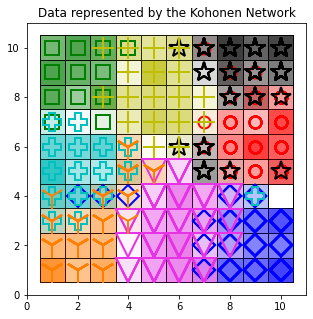

In [7]:
som = SOM.SelfOrganizingMap(10,10,3, hexagonal_map=False)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.1, learning_rate=0.3, distance_function=SOM.NeighbourhoodMexicanHat)
som.plot_map(data=x_train, classes=y_train)

### Map elements: hexagons

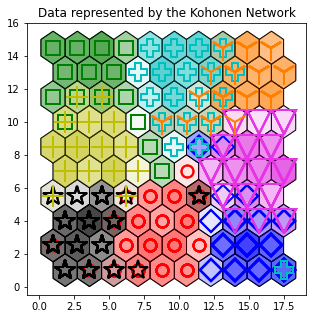

In [9]:
som = SOM.SelfOrganizingMap(10,10,3, hexagonal_map=True)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.1, learning_rate=0.3, distance_function=SOM.NeighbourhoodGaussian)
som.plot_map(data=x_train, classes=y_train)

### Comparison of various distance scalers

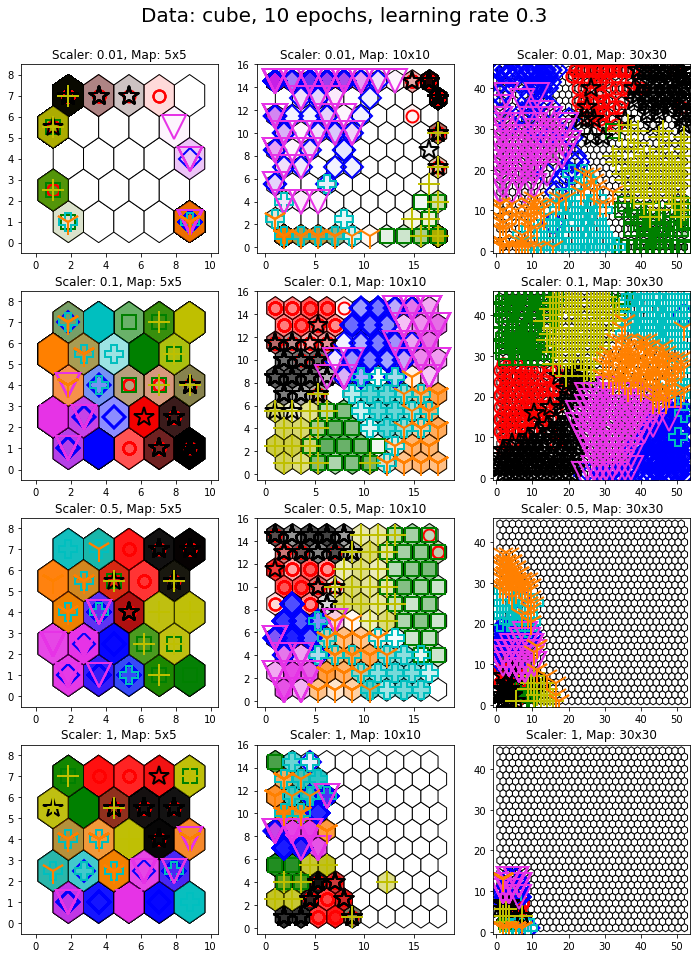

In [10]:
compare_scalers(hexagonal_map=True, dataset_name="cube")

## Summary

Clustering - works.

Both distance functions work.

Number of clusters found is correct and clusters close to each other on the map are also close to each other in the real data.

Depending on the map size and distance scaler, the placement of clusters vary greatly - in some cases, most of the map is empty!